In [1]:
import pandas as pd

hit_file = "../ml/processed_events/normalized_features.parquet"
train_data = pd.read_parquet(hit_file)

In [2]:
# show details and statistics about data 
train_data.describe()

,kinetic_energy,primary_kinetic_energy,X_transformed,Y_transformed,Z_transformed,distance,time_transformed,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith,event_id,pdg,plane
count,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06,2.769807e+06
mean,-7.050409e-16,-2.131628e-14,1.480905e-16,-4.943875e-16,3.634265e-13,1.575309e-16,6.484100e-01,5.298756e-02,9.980874e-01,2.742642e-02,9.996180e-01,4.436522e+07,1.673296e+01,1.468451e+01
std,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.350307e-01,3.179181e-02,1.783988e-03,3.424561e-03,9.424521e-05,3.682648e+05,5.481091e+00,6.348717e+00
min,-1.040013e+00,-2.131628e-14,-3.282371e+00,-1.010552e+01,-2.765655e+00,-2.765618e+00,0.000000e+00,0.000000e+00,9.939936e-01,2.132192e-02,9.994394e-01,4.383890e+07,1.100000e+01,0.000000e+00
25%,-7.367155e-01,-2.131628e-14,-7.453590e-01,-6.335242e-01,-7.605646e-01,-7.606164e-01,4.760112e-01,2.710038e-02,9.966494e-01,2.450766e-02,9.995376e-01,4.388805e+07,1.100000e+01,1.100000e+01
50%,-2.806206e-01,-2.131628e-14,6.257174e-02,-1.549453e-01,1.506622e-01,1.507482e-01,6.849360e-01,5.018944e-02,9.987397e-01,2.728401e-02,9.996277e-01,4.463418e+07,2.200000e+01,1.600000e+01
75%,4.265052e-01,-2.131628e-14,7.418061e-01,4.977457e-01,8.796848e-01,8.798398e-01,8.533313e-01,8.179176e-02,9.996327e-01,3.040839e-02,9.996996e-01,4.463505e+07,2.200000e+01,2.000000e+01
max,1.081711e+01,-2.131628e-14,3.281062e+00,1.011491e+01,1.431117e+00,1.426659e+00,1.000000e+00,1.094382e-01,1.000000e+00,3.347824e-02,9.997727e-01,4.463600e+07,2.200000e+01,2.300000e+01


In [3]:
train_data['X_transformed']

0          1.591330
1          1.601721
2          1.595808
3          1.577263
4          1.698990
             ...   
2769802    1.522845
2769803    1.544435
2769804    1.542422
2769805    1.543425
2769806    1.546864
Name: X_transformed, Length: 2769807, dtype: float64

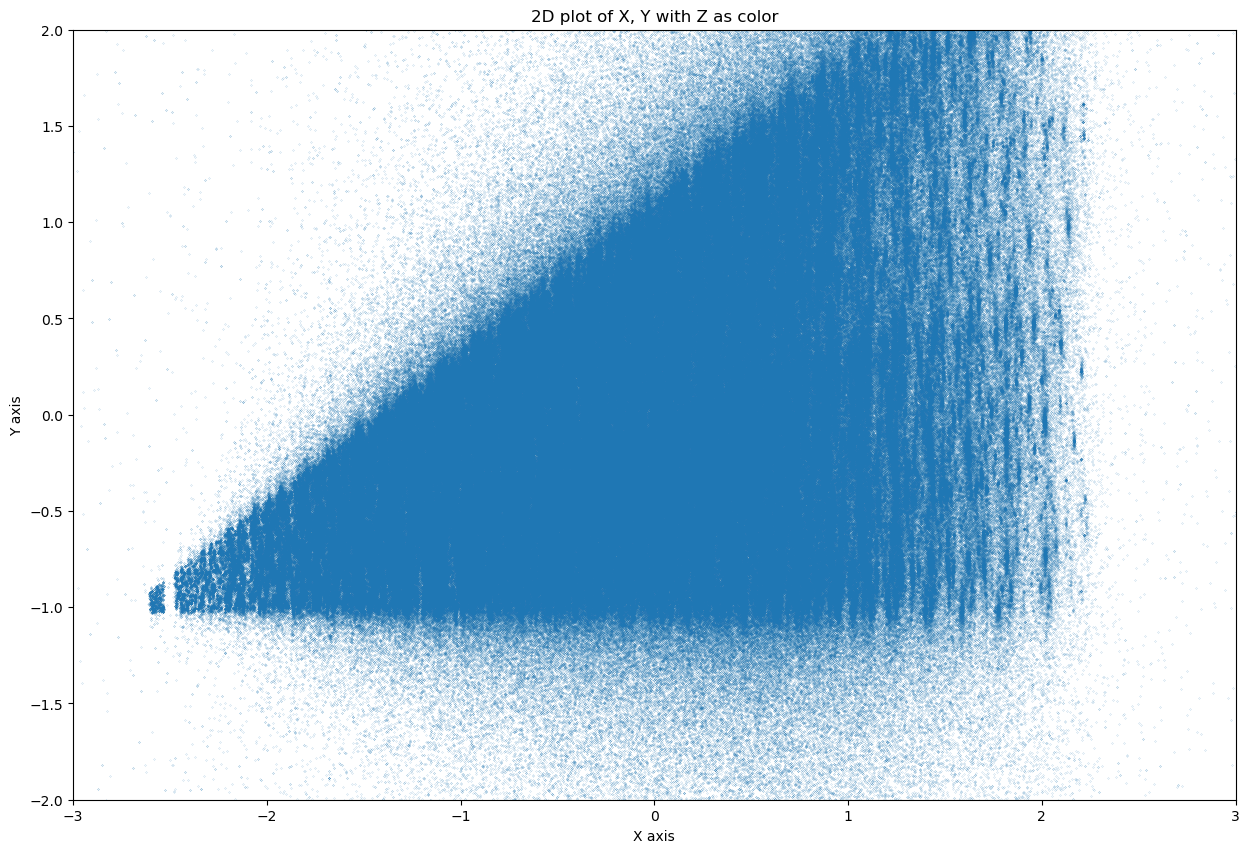

In [4]:
# 2d plot of x,y z, transfomed to 2d, from train_data
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D scatter plot
figure, ax = plt.subplots(figsize=(15, 10))
plt.scatter(train_data['X_transformed'].values, train_data['Y_transformed'].values, s=0.01)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.title('2D plot of X, Y with Z as color')
plt.show()


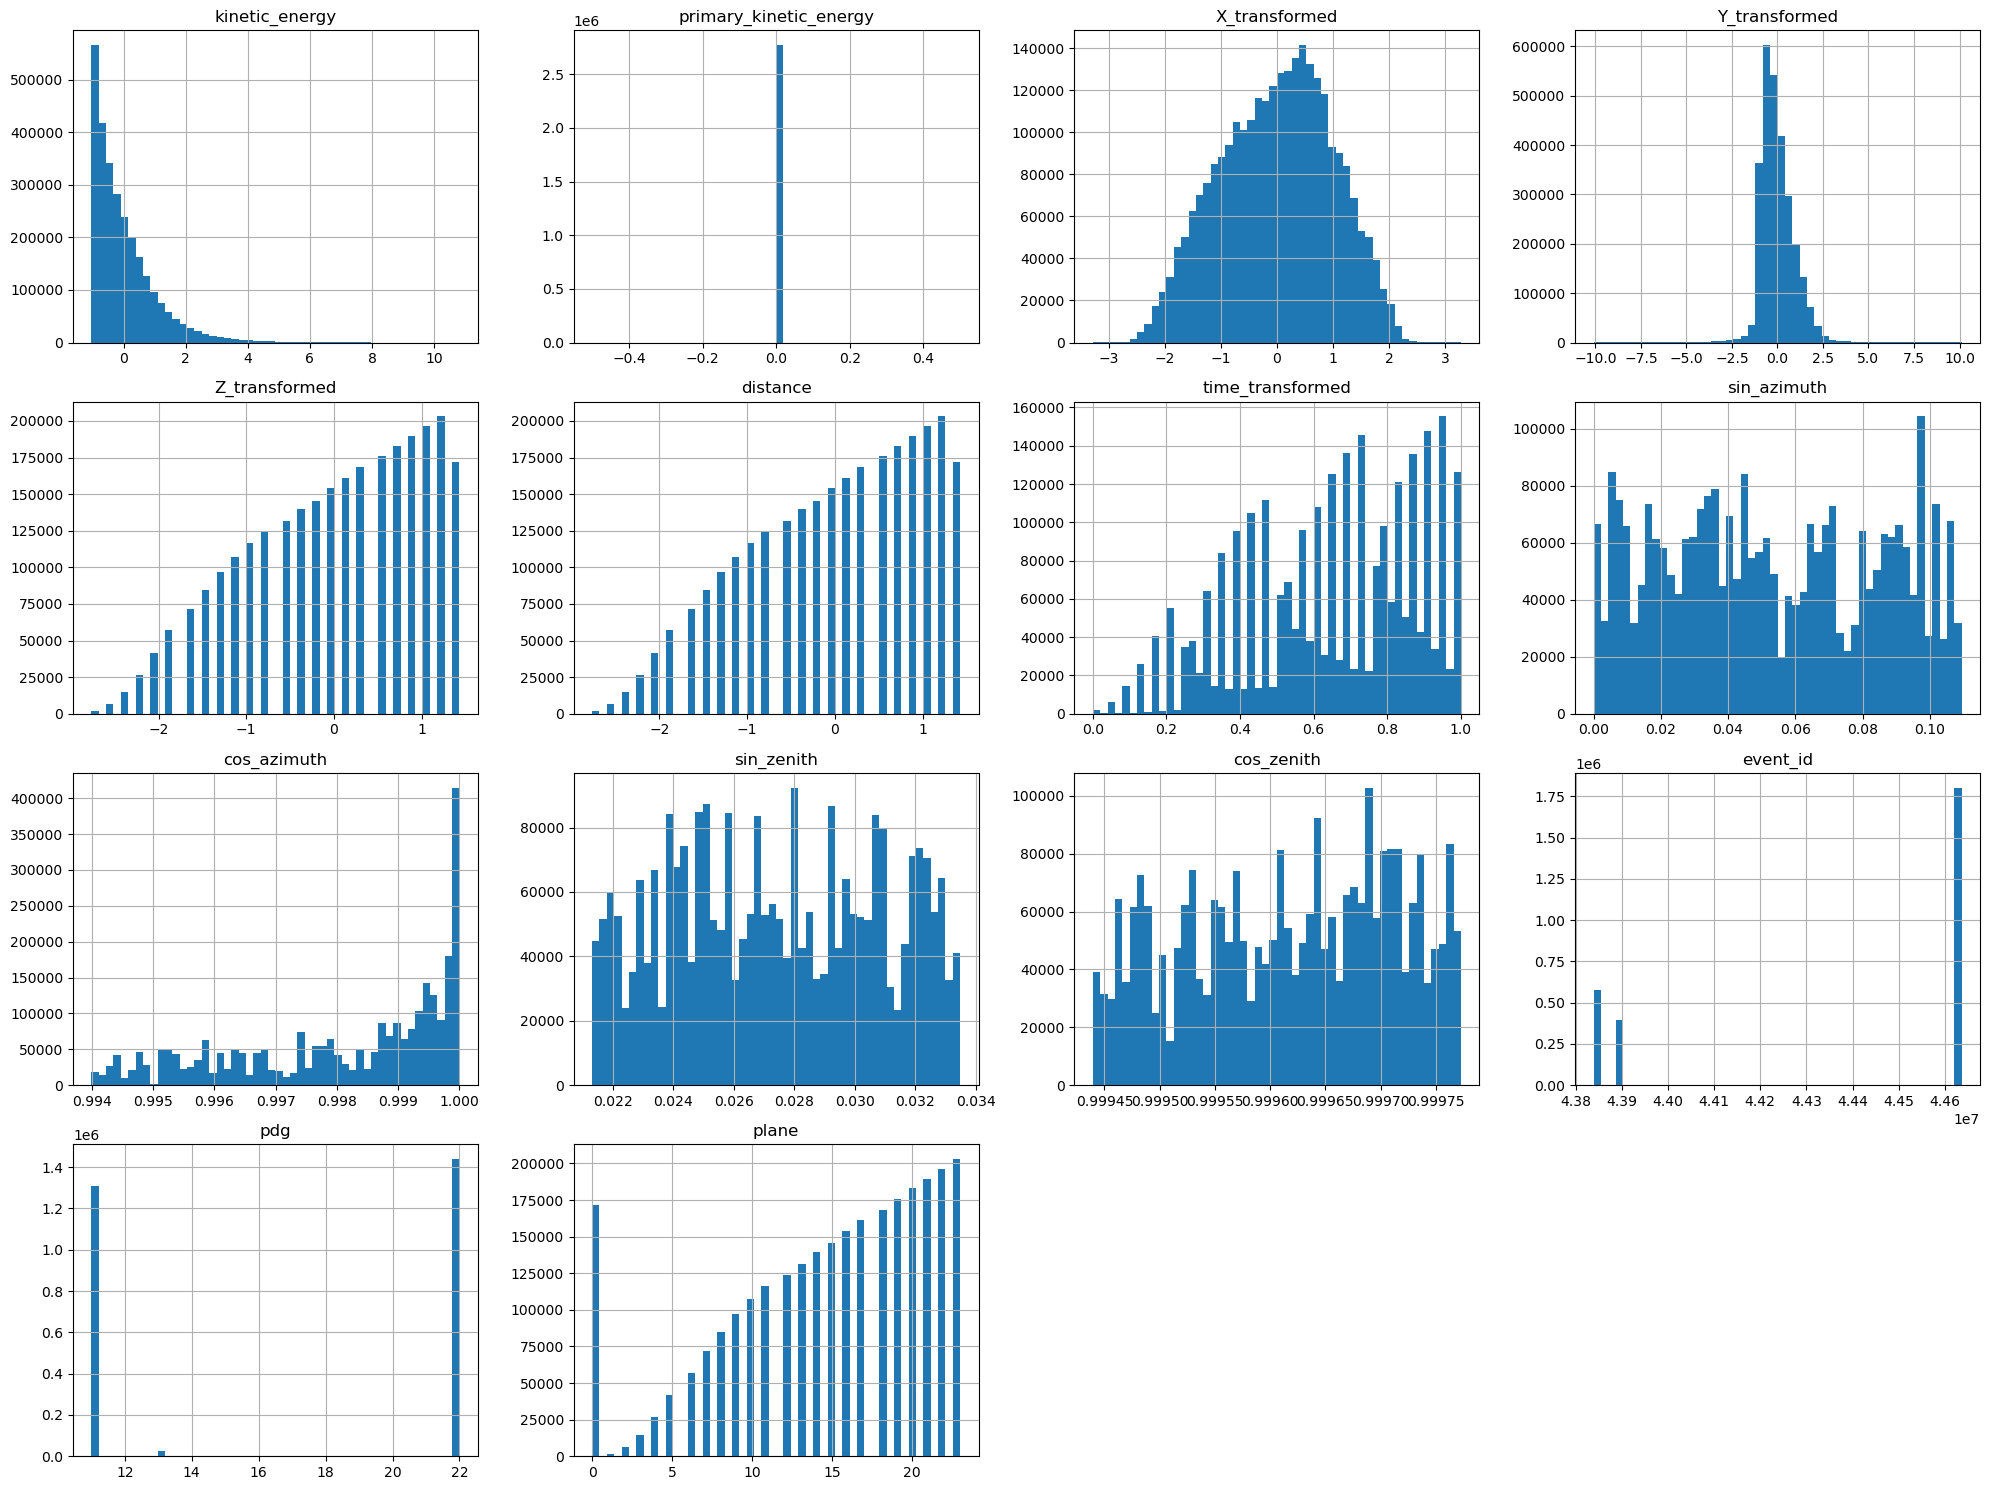

In [5]:
# plot histograms of each feature
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


In [6]:
# ordered numbers of unique planes

arr = train_data['plane'].unique()

arr.sort()
arr

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [7]:
train_data['Z_transformed'].max

<bound method Series.max of 0          1.426464
1          1.426455
2          1.426460
3          1.426476
4          1.426371
             ...   
2769802    1.244102
2769803    1.244083
2769804    1.244084
2769805    1.244083
2769806    1.244080
Name: Z_transformed, Length: 2769807, dtype: float64>

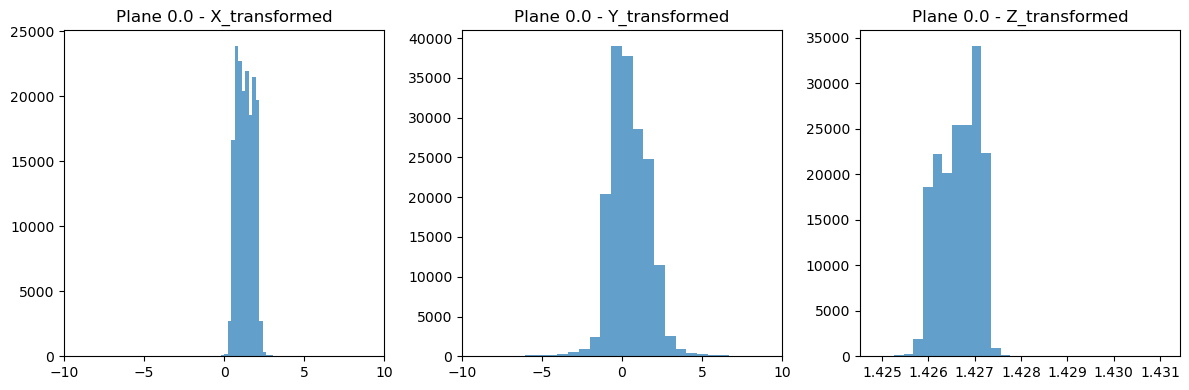

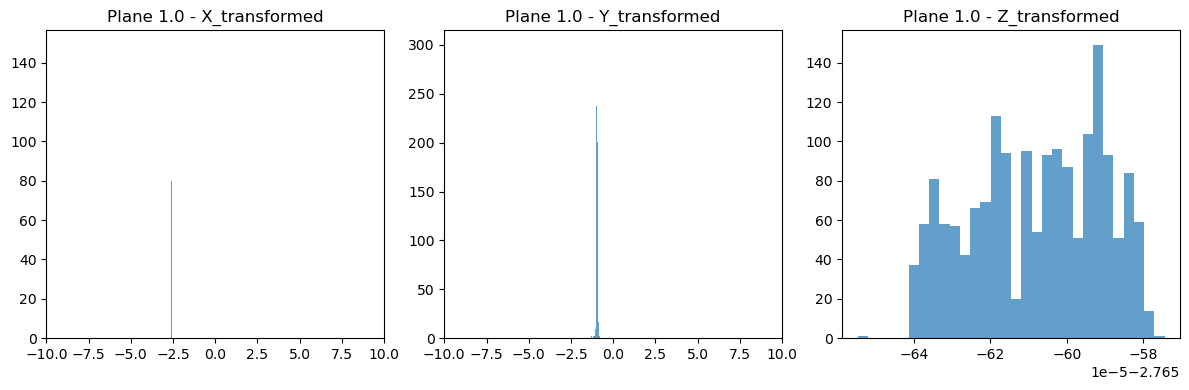

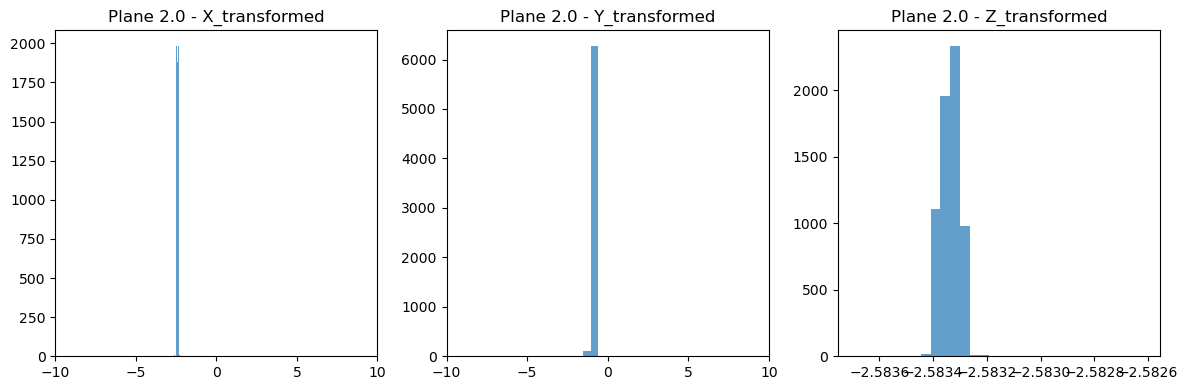

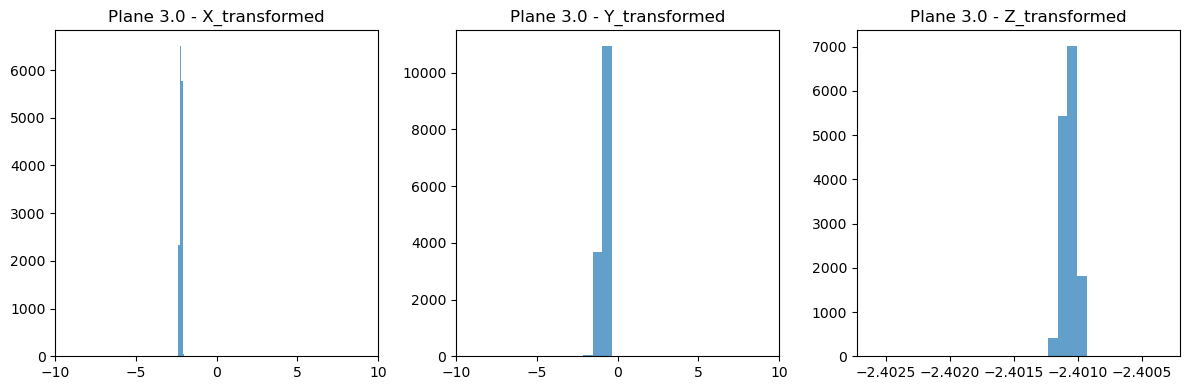

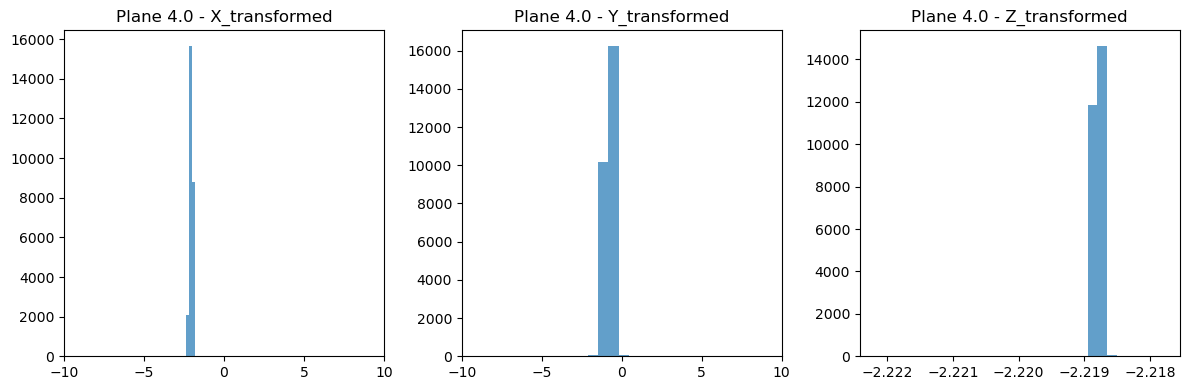

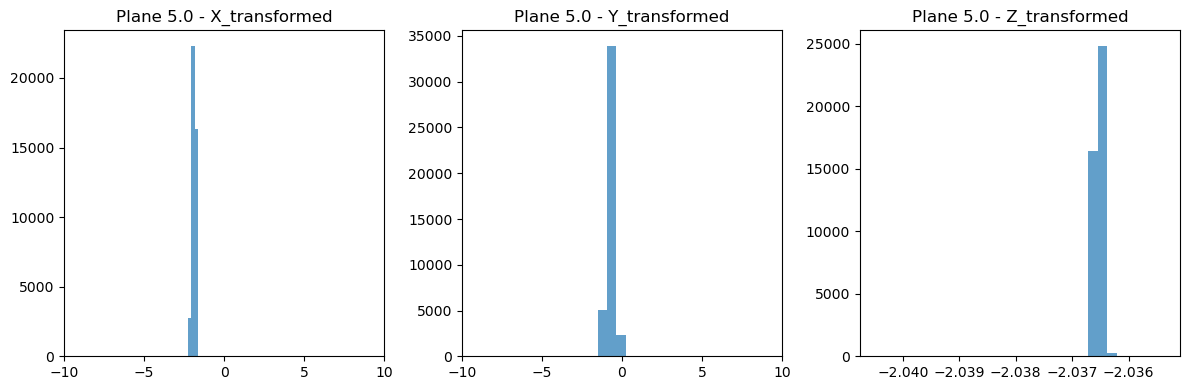

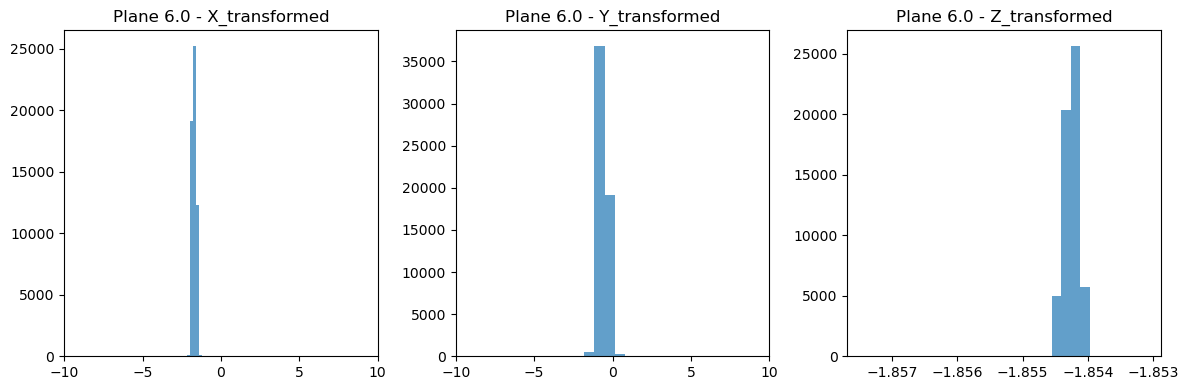

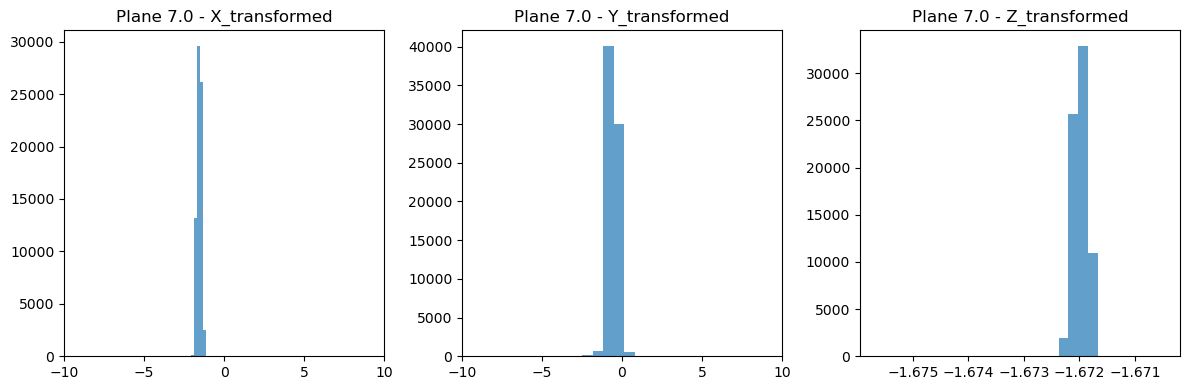

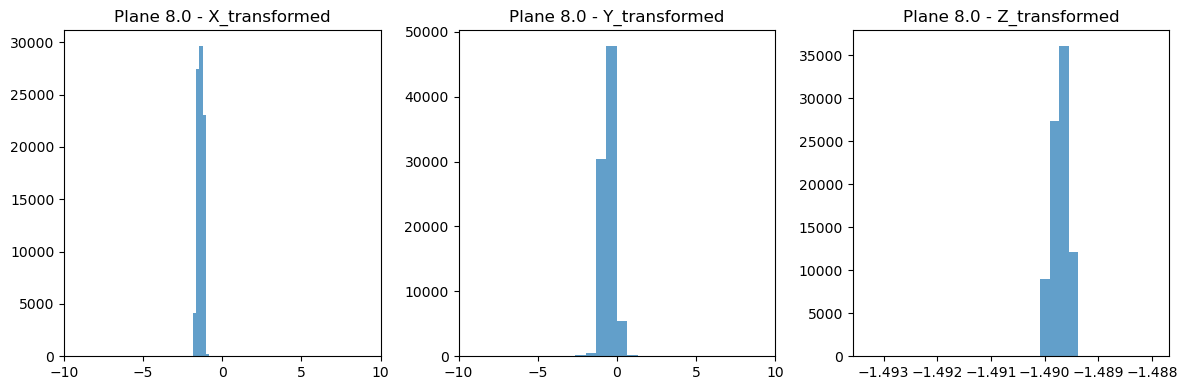

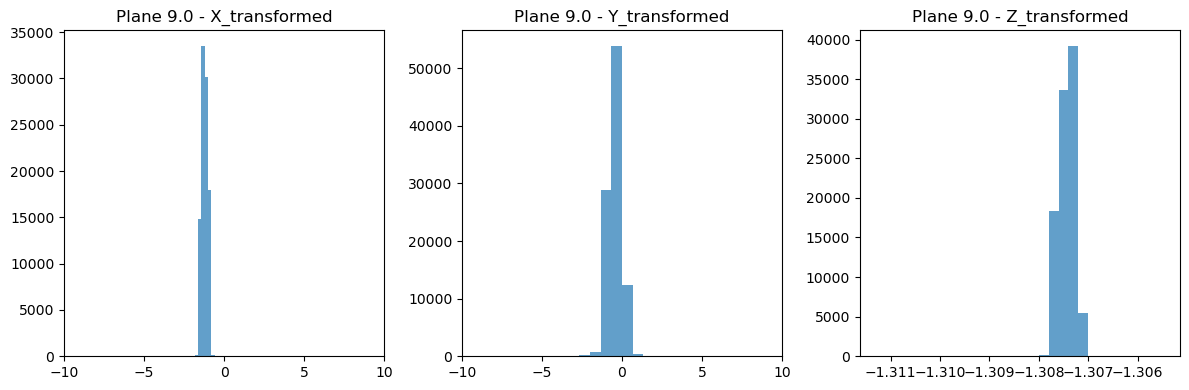

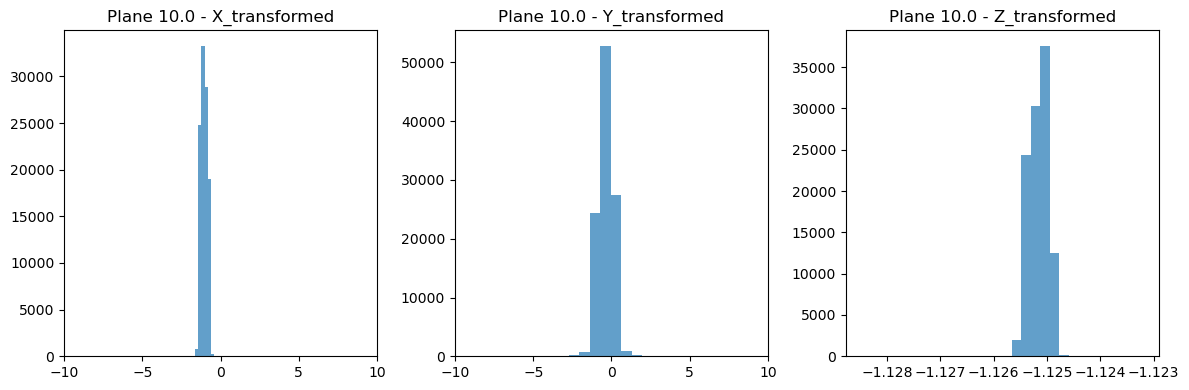

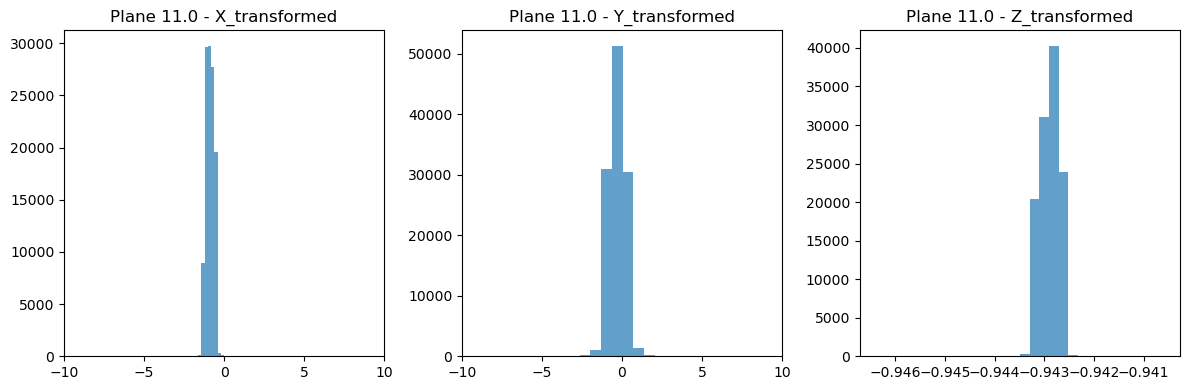

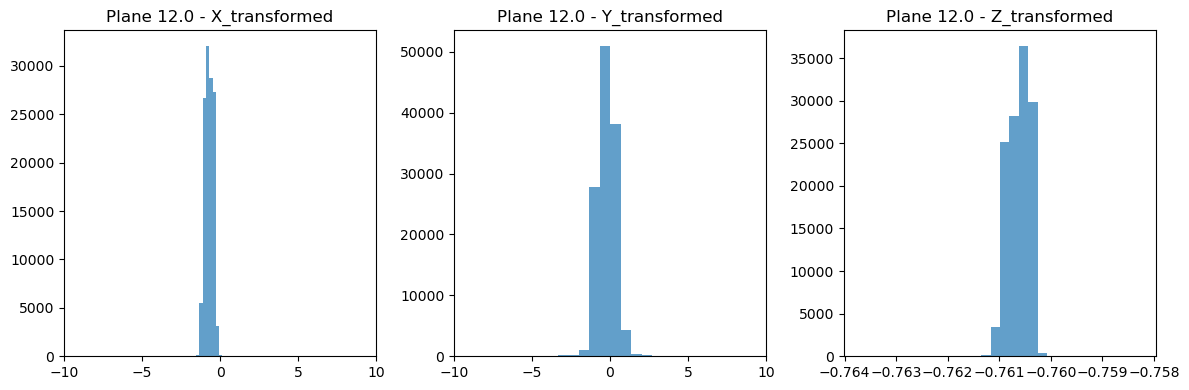

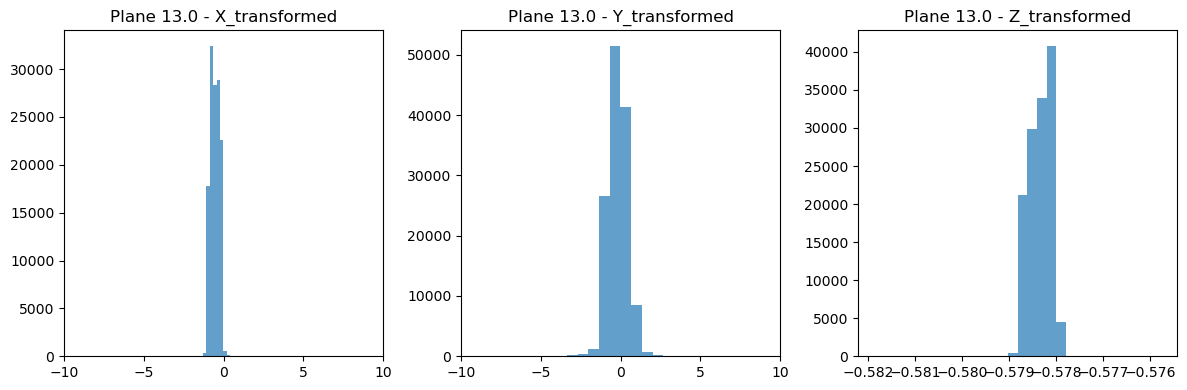

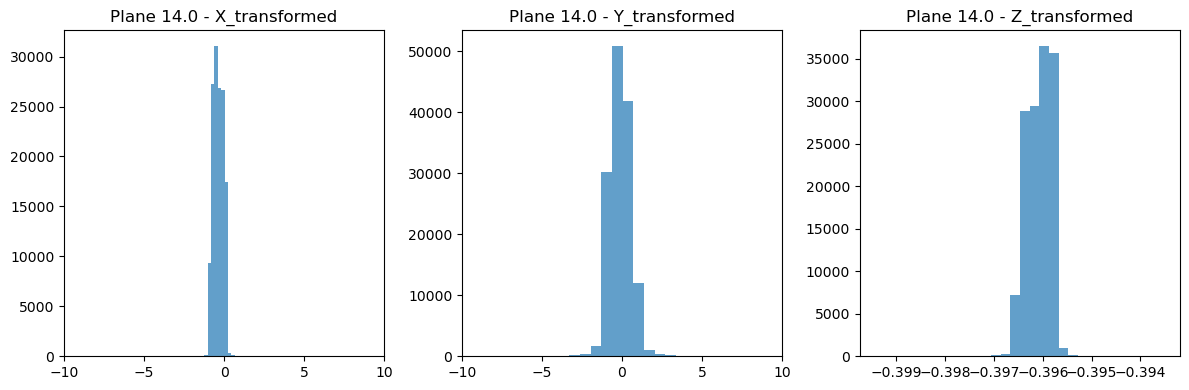

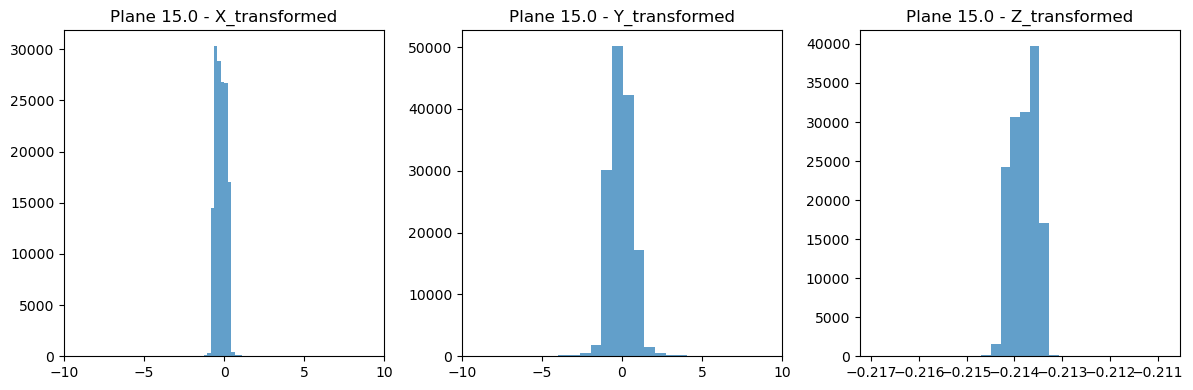

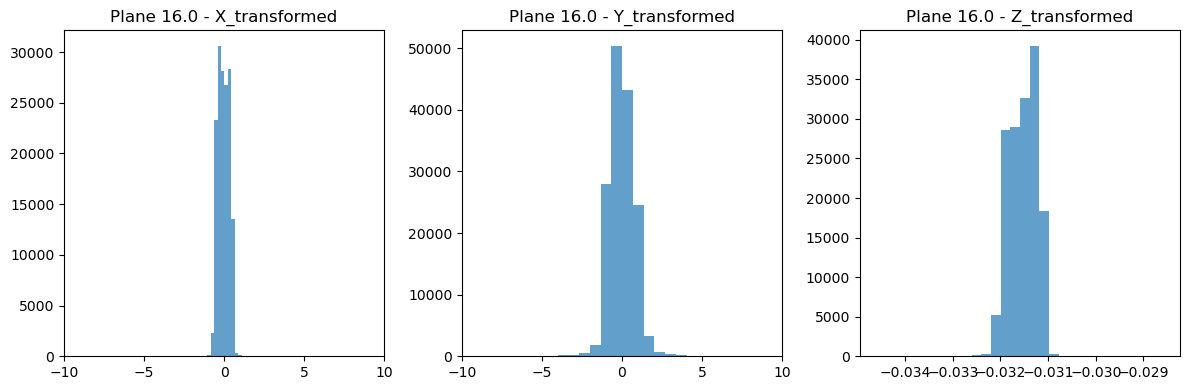

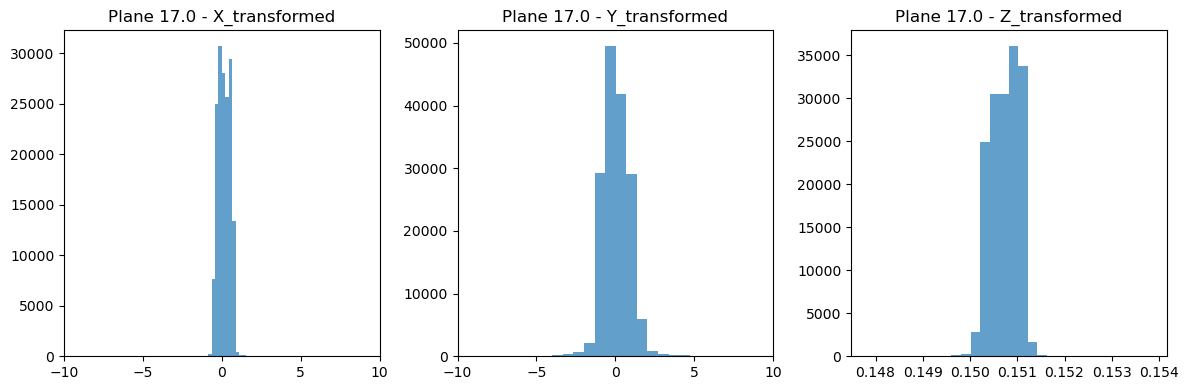

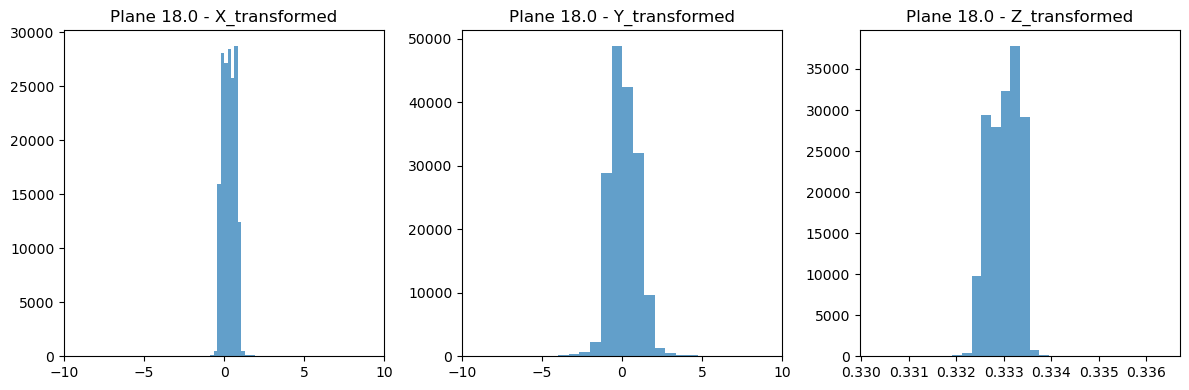

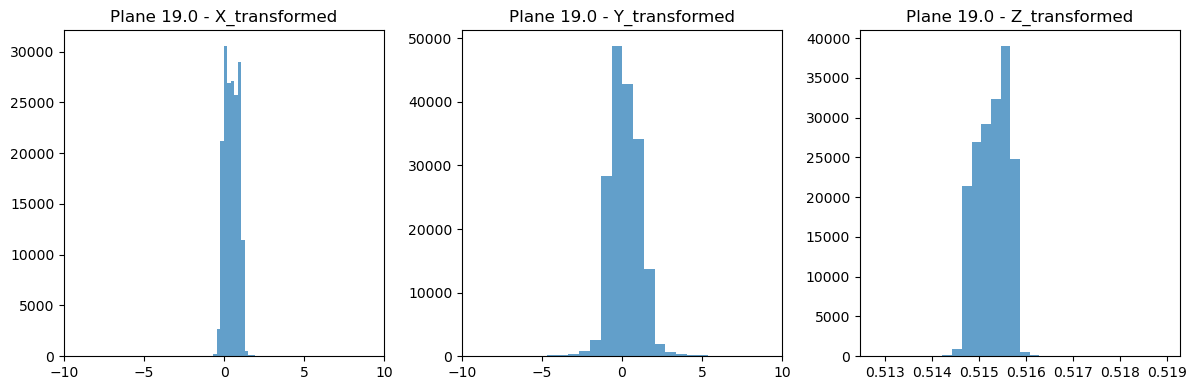

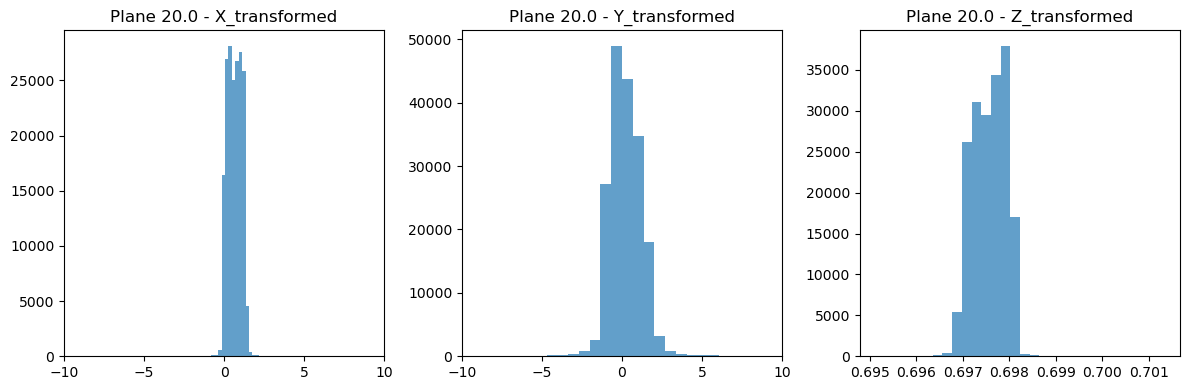

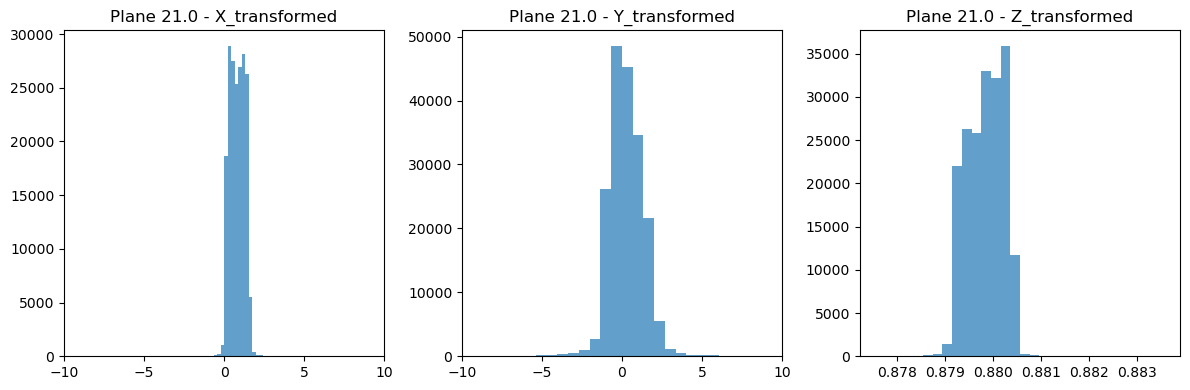

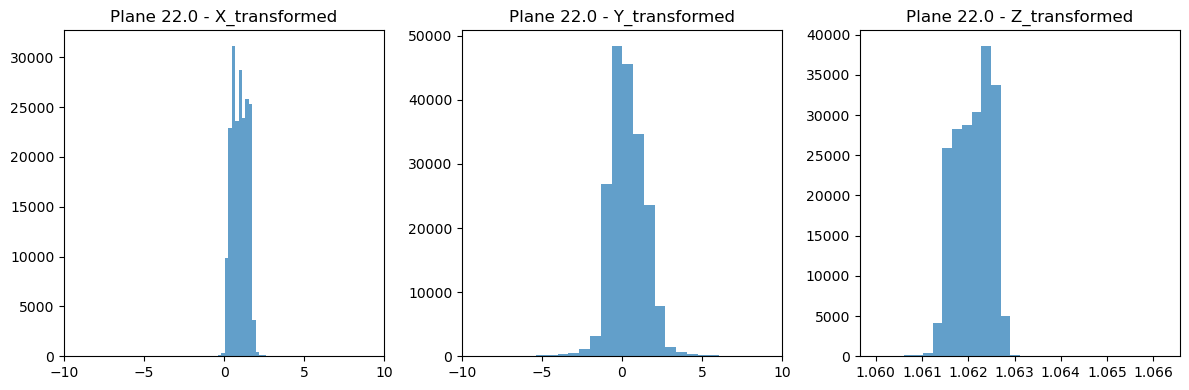

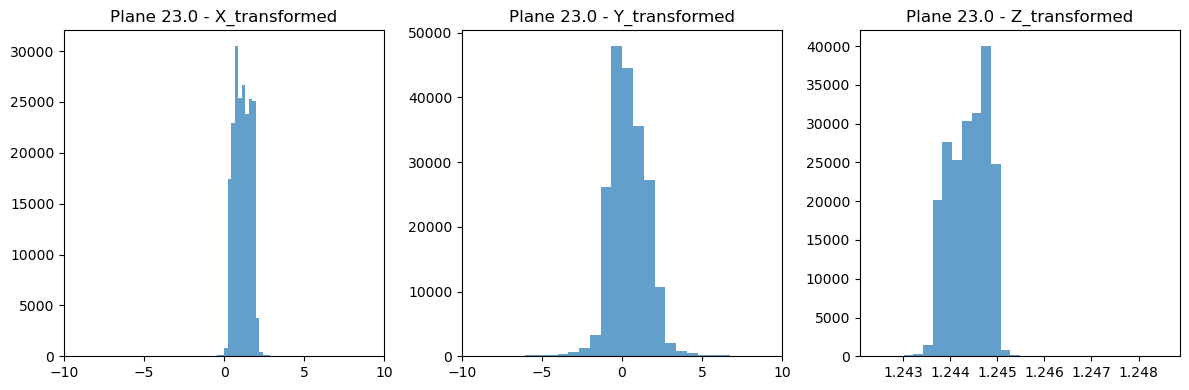

In [8]:
# group data for each plane
# measure variation for each of the x, y z coordinates for each plane
# average std deviation and mean
# plot histogram of each dimension for each plane

import matplotlib.pyplot as plt
df = train_data.copy()
arr = df['plane'].unique()
arr.sort()

for plane in arr:
    df_plane = df[df['plane'] == plane]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(df_plane['X_transformed'], bins=30, alpha=0.7, label='X_transformed')
    plt.title(f'Plane {plane} - X_transformed')
    plt.xlim(-10, 10)
    plt.subplot(1, 3, 2)
    plt.hist(df_plane['Y_transformed'], bins=30, alpha=0.7, label='Y_transformed')
    plt.title(f'Plane {plane} - Y_transformed')
    plt.xlim(-10, 10)
    plt.subplot(1, 3, 3)
    plt.hist(df_plane['Z_transformed'], bins=30, alpha=0.7, label='Z_transformed')
    plt.title(f'Plane {plane} - Z_transformed')
    # plt.xlim(-10, 10)
    plt.tight_layout()
    plt.show()
    
# df_grouped = df.groupby('plane').agg({
#     'X_transformed': ['mean', 'min', 'max'],
#     'Y_transformed': ['mean', 'min', 'max'],
#     'Z_transformed': ['mean', 'min', 'max']
# }).reset_index()

# df_grouped

In [9]:
import sklearn as sk
from sklearn.model_selection import train_test_split

input_columns = [
            "primary_kinetic_energy",
            "sin_azimuth", "cos_azimuth", "sin_zenith", "cos_zenith"
        ]
output_columns = [
            "kinetic_energy", 
            # "distance",
            "X_transformed", "Y_transformed", "Z_transformed",
        ]
batch_identifier = "event_id"

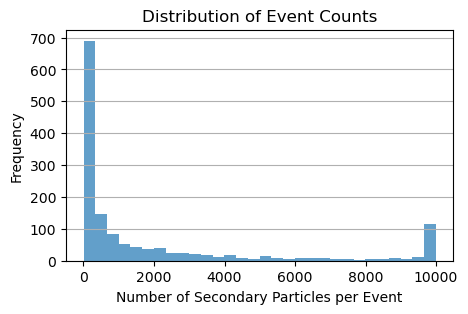

In [10]:
import matplotlib.pyplot as plt

# count number of rows per event and plot distribution
event_counts = train_data[batch_identifier].value_counts().sort_index()
plt.figure(figsize=(5, 3))
plt.hist(event_counts, bins=30, alpha=0.7)
plt.title("Distribution of Event Counts")
plt.xlabel("Number of Secondary Particles per Event")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

In [11]:
# print average variation in input columns for each event
for col in input_columns:
    event_variation = train_data.groupby(batch_identifier)[col].std()
    print(f"Average variation in {col} per event:\n", event_variation.mean())

Average variation in primary_kinetic_energy per event:
 0.0
Average variation in sin_azimuth per event:
 0.0
Average variation in cos_azimuth per event:
 0.0
Average variation in sin_zenith per event:
 0.0
Average variation in cos_zenith per event:
 0.0


In [12]:
# select only plane 23
event_stats = train_data[train_data['plane'] == 23].reset_index(drop=True)
# event_stats = train_data

# for each event keep the input features and calcuate mean and std of the outptu features
# save mean and std in separate columns using _ suffixes
event_stats = event_stats.groupby(batch_identifier).agg(
    {
        **{col : 'first' for col in input_columns},
        **{col: ['mean', 'std'] for col in output_columns}
    }
).reset_index()

event_stats.columns = [f"{col}_{stat}" if stat in ['mean', 'std'] else col for col, stat in event_stats.columns]

In [13]:
# update output feature names
output_columns = [f"{col}_mean" for col in output_columns] + [f"{col}_std" for col in output_columns]

In [14]:
event_stats.head()

,event_id,primary_kinetic_energy,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith,kinetic_energy_mean,kinetic_energy_std,X_transformed_mean,X_transformed_std,Y_transformed_mean,Y_transformed_std,Z_transformed_mean,Z_transformed_std
0,43838896.0,-2.131628e-14,0.0,1.0,0.029175,0.999574,-0.219486,0.676049,1.445251,0.032818,-0.908159,0.457519,1.244170,2.820085e-05
1,43840362.0,-2.131628e-14,0.0,1.0,0.021705,0.999764,0.090084,0.518469,0.344221,0.021578,-1.022179,0.445088,1.244997,1.379219e-05
2,43840424.0,-2.131628e-14,0.0,1.0,0.023735,0.999718,-0.788804,NaN,0.673414,NaN,5.840245,NaN,1.244776,NaN
3,43840483.0,-2.131628e-14,0.0,1.0,0.032950,0.999457,0.556581,0.892635,1.955780,0.000430,-1.017549,0.001895,1.243701,4.169853e-07
4,43840801.0,-2.131628e-14,0.0,1.0,0.027665,0.999617,-0.300527,0.762012,1.189069,0.144683,-0.962779,0.920653,1.244385,1.178862e-04


In [15]:
# validate na values before imputation
print(f"NA values before imputation:\n{event_stats.isnull().sum()}")

# impute na with 0
event_stats = event_stats.fillna(0)

# validate na values after imputation
print(f"NA values after imputation:\n{event_stats.isnull().sum()}")

NA values before imputation:
event_id                   0
primary_kinetic_energy     0
sin_azimuth                0
cos_azimuth                0
sin_zenith                 0
cos_zenith                 0
kinetic_energy_mean        0
kinetic_energy_std        74
X_transformed_mean         0
X_transformed_std         74
Y_transformed_mean         0
Y_transformed_std         74
Z_transformed_mean         0
Z_transformed_std         74
dtype: int64
NA values after imputation:
event_id                  0
primary_kinetic_energy    0
sin_azimuth               0
cos_azimuth               0
sin_zenith                0
cos_zenith                0
kinetic_energy_mean       0
kinetic_energy_std        0
X_transformed_mean        0
X_transformed_std         0
Y_transformed_mean        0
Y_transformed_std         0
Z_transformed_mean        0
Z_transformed_std         0
dtype: int64


In [16]:
print(f"Event stats columns: {event_stats.columns}")
print(f"Input columns: {input_columns}")
print(f"Output columns: {output_columns}")

Event stats columns: Index(['event_id', 'primary_kinetic_energy', 'sin_azimuth', 'cos_azimuth',
       'sin_zenith', 'cos_zenith', 'kinetic_energy_mean', 'kinetic_energy_std',
       'X_transformed_mean', 'X_transformed_std', 'Y_transformed_mean',
       'Y_transformed_std', 'Z_transformed_mean', 'Z_transformed_std'],
      dtype='object')
Input columns: ['primary_kinetic_energy', 'sin_azimuth', 'cos_azimuth', 'sin_zenith', 'cos_zenith']
Output columns: ['kinetic_energy_mean', 'X_transformed_mean', 'Y_transformed_mean', 'Z_transformed_mean', 'kinetic_energy_std', 'X_transformed_std', 'Y_transformed_std', 'Z_transformed_std']


In [17]:
# split inputs and outputs 
X = event_stats[input_columns]
y = event_stats[output_columns]

# split into training and validation sets using sklearn
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

print(f"Training set size: {X_train.shape[0]} events")
print(f"Validation set size: {X_val.shape[0]} events")

Training set size: 935 events
Validation set size: 234 events


In [18]:
# list number of features
print(f"Number of input features: {X_train.shape[1]}")
print(f"Number of output features: {y_train.shape[1]}")

Number of input features: 5
Number of output features: 8


In [19]:
# train a simple FFN model based on torch
import torch.nn as nn
class SimpleFFN(nn.Module):
    def __init__(self, input_size=5, output_size=10, hidden_dim=10):
        super(SimpleFFN, self).__init__()
        
        self.hit_encoder = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        )
        self.event_head = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_size),
        )
        
        
    def forward(self, x):
        x = self.hit_encoder(x)
        x = self.event_head(x)
        return x

In [20]:
# train and test NN model using adam optimizer and MSE loss

import torch
import torch.optim as optim
model = SimpleFFN(input_size=X_train.shape[1], output_size=y_train.shape[1], hidden_dim=10)
# use relative error as loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [21]:
X_train.shape[1]

5

In [22]:
# start training loop
num_epochs = 300000
epochs = []
val_losses = []

inputs = torch.tensor(X_train.values, dtype=torch.float32)
targets = torch.tensor(y_train.values, dtype=torch.float32)
val_inputs = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y_val.values, dtype=torch.float32)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        model.eval()
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_targets)
        
        epochs.append(epoch)
        val_losses.append(val_loss.item())
        
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

Epoch [1000/300000], Loss: 0.4881, Val Loss: 0.4894
Epoch [2000/300000], Loss: 0.2865, Val Loss: 0.2946
Epoch [3000/300000], Loss: 0.2862, Val Loss: 0.2939
Epoch [4000/300000], Loss: 0.2857, Val Loss: 0.2934
Epoch [5000/300000], Loss: 0.2808, Val Loss: 0.2884
Epoch [6000/300000], Loss: 0.2338, Val Loss: 0.2413
Epoch [7000/300000], Loss: 0.1885, Val Loss: 0.1978
Epoch [8000/300000], Loss: 0.1875, Val Loss: 0.1967
Epoch [9000/300000], Loss: 0.1870, Val Loss: 0.1962
Epoch [10000/300000], Loss: 0.1865, Val Loss: 0.1958
Epoch [11000/300000], Loss: 0.1860, Val Loss: 0.1952
Epoch [12000/300000], Loss: 0.1853, Val Loss: 0.1945
Epoch [13000/300000], Loss: 0.1845, Val Loss: 0.1937
Epoch [14000/300000], Loss: 0.1836, Val Loss: 0.1928
Epoch [15000/300000], Loss: 0.1828, Val Loss: 0.1918
Epoch [16000/300000], Loss: 0.1818, Val Loss: 0.1908
Epoch [17000/300000], Loss: 0.1803, Val Loss: 0.1892
Epoch [18000/300000], Loss: 0.1770, Val Loss: 0.1858
Epoch [19000/300000], Loss: 0.1681, Val Loss: 0.1760
Ep

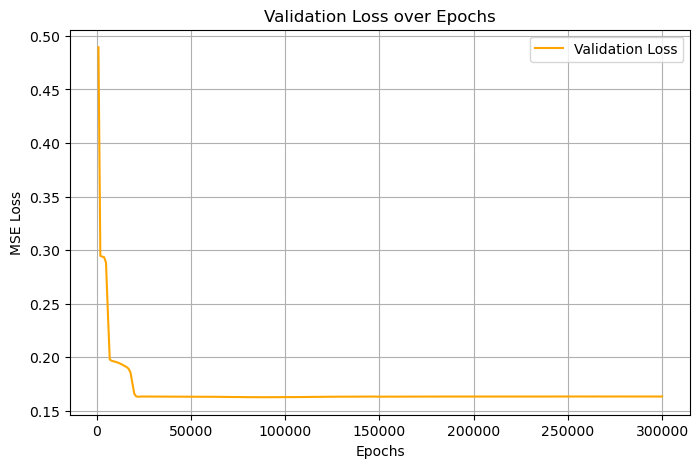

In [23]:
# plot losses
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [24]:
# test the model on validation set
model.eval()
val_inputs = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y_val.values, dtype=torch.float32)
val_outputs = model(val_inputs)
val_loss = criterion(val_outputs, val_targets)
print(f"Final Validation Loss: {val_loss.item():.4f}")

Final Validation Loss: 0.1634


In [25]:
# mean output values in data
mean_values = event_stats[output_columns].mean()
print("Mean output values in data:")
print(mean_values)

Mean output values in data:
kinetic_energy_mean   -0.092001
X_transformed_mean     1.159426
Y_transformed_mean     0.452864
Z_transformed_mean     1.244378
kinetic_energy_std     0.753710
X_transformed_std      0.092179
Y_transformed_std      0.688914
Z_transformed_std      0.000075
dtype: float64


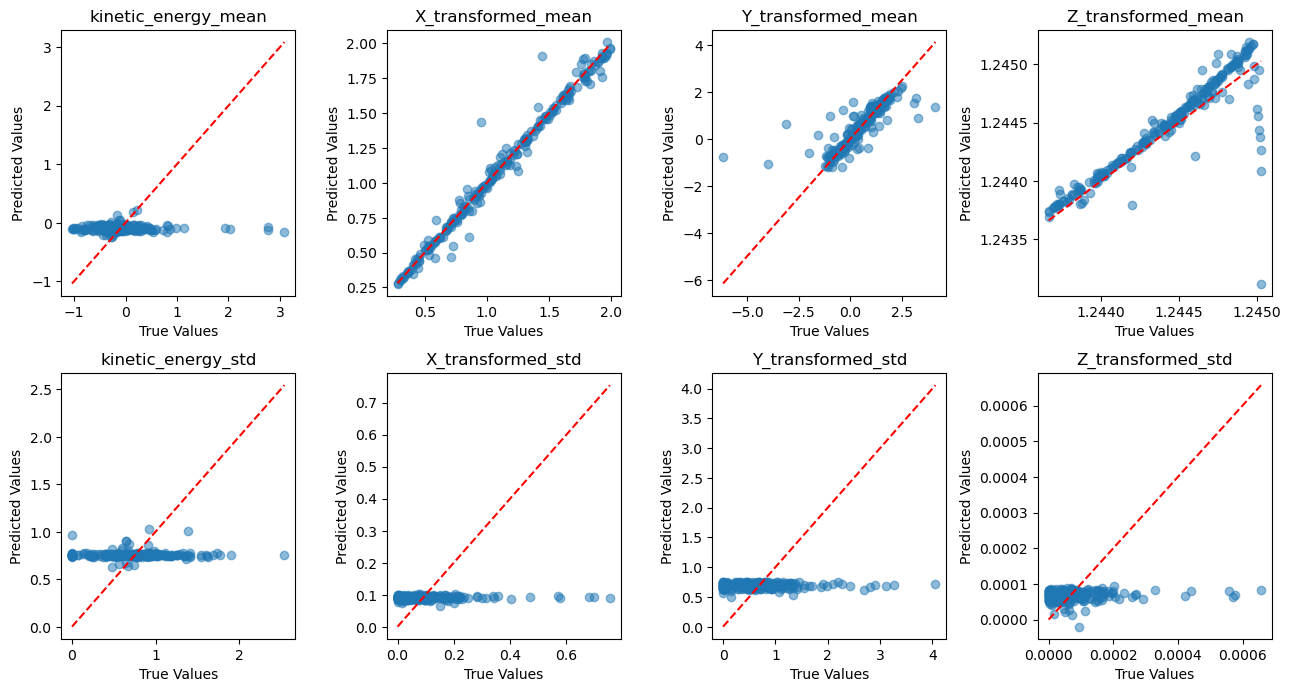

In [26]:
# plot targets vs predictions for validation set
import numpy as np
val_outputs_np = val_outputs.detach().numpy()
val_targets_np = val_targets.detach().numpy()  
plt.figure(figsize=(13, 10))
# use 3 columns per row
for i, col in enumerate(output_columns):
    plt.subplot(len(output_columns)//4+1, 4, i+1)
    plt.scatter(val_targets_np[:, i], val_outputs_np[:, i], alpha=0.5)
    plt.plot([val_targets_np[:, i].min(), val_targets_np[:, i].max()],
             [val_targets_np[:, i].min(), val_targets_np[:, i].max()], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(col)
plt.tight_layout(pad=1.0)
